<a href="https://colab.research.google.com/github/cherylktt/tensorflow/blob/main/07_milestone_project_1_food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1: Food Vision Big

See the annotated version of this notebook on [GitHub](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb).

## Check GPU

Google Colab offers free GPUs. However, not all of them are compatible with mixed precision training. 

Google Colab offers:
* K80 (not compatible)
* P100 (not compatible)
* Tesla T4 (compatible)

Knowing this, in order to use mixed precision training we need access to a Tesla T4 (from within Google Colab) or if we're using our own hardware, our GPU needs a score of 7.0+ (see here: https://developer.nvidia.com/cuda-gpus).

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8080eddd-c074-d518-39f1-ff689b2196cf)


## Get helper functions

In past modules, we've created a bunch of helper functions to do small tasks required for our notebooks. Rather than rewrite all of these, we can import a script and load them in from there.

In [3]:
# Download helper functions script
!wget https://raw.githubusercontent.com/cherylktt/tensorflow/main/helper_functions.py

--2022-04-25 08:36:13--  https://raw.githubusercontent.com/cherylktt/tensorflow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13526 (13K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.21K  --.-KB/s    in 0s      

2022-04-25 08:36:14 (58.2 MB/s) - ‘helper_functions.py’ saved [13526/13526]



## Use TensorFlow Datasets to download data

If you want to get an overview of TensorFlow Datasets (TFDS), read the guide: https://www.tensorflow.org/datasets/overview

In [4]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [5]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) # is our target dataset in the list of TFDS?

True


In [6]:
# Load in the Food 101 dataset (takes 5-6 minutes in Google Colab
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=False,
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteOEJ3DO/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteOEJ3DO/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with the data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names?

In [7]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
# Take one sample of train data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

In [10]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 56
  Class name (str form): huevos_rancheros
  


In [12]:
# What does our image tensor from TDFS's Food 101 look like
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [13]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

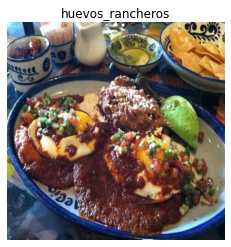

In [14]:
# Plot an image tensor
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis(False)
plt.title(f"{class_names[label.numpy()]}");

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalised, etc). However, not all data (including data from TensorFlow Datasets) comes like this. So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for more mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalised tensors generally perform better

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we're going to be using an EfficientNetBX pretrained model from tf.keras.applications, we don't need to rescale our data (these architectures have rescaling built-in).

This means our functions needs to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors from `uint8` to `float32`.


In [15]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  
  """
  Converts image dataype from `uint8` to `float32` and reshapes
  image to [img_shape, img_shape, colour_channels=3]
  """

  image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
  # image = image/255. # scale image values, not required with EfficientNetBX model from tf.keras.applications
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [16]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"""
Image before preprocessing:\n{image[:2]}...
Shape: {image.shape}
Dtype: {image.dtype}\n
Image after preprocessing:\n{preprocessed_img[:2]}...
Shape: {preprocessed_img.shape}
Dtype: {preprocessed_img.dtype}
""")


Image before preprocessing:
[[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]...
Shape: (512, 512, 3)
Dtype: <dtype: 'uint8'>

Image after preprocessing:
[[[230.65816  253.64285  251.      ]
  [222.99998  254.97449  252.19388 ]
  [207.06633  255.       250.36734 ]
  ...
  [140.66287  129.52519  121.22428 ]
  [121.14268  115.265144 116.95397 ]
  [ 83.95363   83.08119   89.63737 ]]

 [[221.47449  254.37755  253.33163 ]
  [214.5102   255.       253.92348 ]
  [198.41327  254.58673  251.96939 ]
  ...
  [208.66318  195.82143  173.40823 ]
  [197.03056  190.1071   174.83162 ]
  [175.54036  171.6169   161.21384 ]]]...
Shape: (224, 224, 3)
Dtype: <dtype: 'float32'>



## Batch & prepare datasets

We're not going to make our data input pipeline run really fast. For more resources on this, go through the following guide: https://www.tensorflow.org/guide/data_performance

In [17]:
# Map preprocessing function to training data (and parallelise it)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

* `map_func=preprocess_img`: map the preprocessing function (`preprocess_img`) across `train_data`
* `num_parallel_calls=tf.data.AUTOTUNE`: utilise as many processors as possible to speed up mapping function
* `.shuffle(buffer_size=1000)`: shuffle 1000 elements at a single time
* `.batch(batch_sie=32)`: batch the data together into batches of 32
* `.prefetch(buffer_size=tf.data.AUTOTUNE)`: prepare new batches (prefetch) whilst the model is looking through (finding patterns) the current batch

## Create modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:
* TensorBoard callback to log training results (so we can visualise them later if need be)
* ModelCheckpoint callback to save our model's progress after feature extraction

In [19]:
# Create TensorBoard callback (import from helper_functions.py)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoing callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor="val_acc",
                                                         save_best_only=True,
                                                         save_weights_only=True,
                                                         verbose=0) # don't print anything

## Setup mixed precision training

First and foremost, for a deeper understanding of mixed precision training, checkout the TensorFlow guide for mixed precision: https://www.tensorflow.org/guide/mixed_precision

Mixed precision utilises a combination of `float32` and `float16` data types to speed up model performance (can result in a 3x speed up on modern GPUs).

In [20]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [21]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model

In [22]:
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="output_layer")(x)
model_0 = keras.Model(inputs, outputs)

# Compile the model
model_0.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [23]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D_l  (None, 1280)             0         
 ayer (GlobalAveragePooling2                                     
 D)                                                              
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 output_layer (Activation)   (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

## Cheking layer dtype policies (are we using mixed precision?)

In [24]:
# Check the dtype_policy attributes of layers in our model
for layer in model_0.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling_2D_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "float32">


Going through the above we see:
* `layer.name`: the human readable name of a particular label
* `layer.trainable`: is the layer trainable or ont? (if `False`, the weights are frozen)
* `layer.dtype`: the datatype a layer stores its variables in
* `layer.dtype_policy`: the datatype policy a layer computes on its variables with

In [25]:
# Check the dtype_policy attributes of layers in the base model
for i, layer in enumerate(model_0.layers[1].layers[:20]):
  print(i, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 input_1 False float32 <Policy "float32">
1 rescaling False float32 <Policy "mixed_float16">
2 normalization False float32 <Policy "mixed_float16">
3 stem_conv_pad False float32 <Policy "mixed_float16">
4 stem_conv False float32 <Policy "mixed_float16">
5 stem_bn False float32 <Policy "mixed_float16">
6 stem_activation False float32 <Policy "mixed_float16">
7 block1a_dwconv False float32 <Policy "mixed_float16">
8 block1a_bn False float32 <Policy "mixed_float16">
9 block1a_activation False float32 <Policy "mixed_float16">
10 block1a_se_squeeze False float32 <Policy "mixed_float16">
11 block1a_se_reshape False float32 <Policy "mixed_float16">
12 block1a_se_reduce False float32 <Policy "mixed_float16">
13 block1a_se_expand False float32 <Policy "mixed_float16">
14 block1a_se_excite False float32 <Policy "mixed_float16">
15 block1a_project_conv False float32 <Policy "mixed_float16">
16 block1a_project_bn False float32 <Policy "mixed_float16">
17 block2a_expand_conv False float32 <Policy 

In [26]:
# Switch back to float32
# mixed_precision.set_global_policy("float32")

## Fit the feature extraction model on the training data

If our goal is to fine-tune a pretrained model, the general order of doing things is:
1. Build a feature extraction model (train a couple output layers with base layers frozen)
2. Fine tune some of the frozen layers

In [27]:
# Fit the feature extraction model with callbacks
history_feature_extraction = model_0.fit(train_data,
                                    epochs=3,
                                    steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=int(0.15 * len(test_data)),
                                    callbacks=[create_tensorboard_callback(dir_name="milestone_project_1_food_vision",
                                                                           experiment_name="food_vision_all_data_feature_extraction_model"),
                                               model_checkpoint])

Saving TensorBoard log files to milestone_project_1_food_vision/food_vision_all_data_feature_extraction_model/20220425-084629
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.8201 - accuracy: 0.5558WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 280s 110ms/step - loss: 1.8201 - accuracy: 0.5558 - val_loss: 1.2270 - val_accuracy: 0.6764
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2957 - accuracy: 0.6653WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 252s 105ms/step - loss: 1.2956 - accuracy: 0.6653 - val_loss: 1.1300 - val_accuracy: 0.7010
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1445 - accuracy: 0.7013WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 192s 80ms/step - loss: 1.1445 - accuracy: 0.7013 - val_loss: 1.0924 - val_accuracy: 0.7074


In [28]:
# Evaluate model on whole test dataset
results_feature_extraction = model_0.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 1.0905 - accuracy: 0.7068


**Note:** The challenge is to complete the TEMPLATE verison of 07 to obtain a computer vision model (building off the one we've built in this notebook) to beat the DeepFood paper. In other words, we're going to create Food Vision Big.

> The template notebook can be found [here](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/TEMPLATE_07_food_vision_milestone_project_1.ipynb), and the non-template version [here](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb).

## Save the whole model to file

In [29]:
# Save model locally
model_0.save("/content/drive/MyDrive/tensorflow_projects/food_vision_big")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_big/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_big/assets


In [30]:
# Load model previously saved above
loaded_feature_extraction_model = tf.keras.models.load_model("/content/drive/MyDrive/tensorflow_projects/food_vision_big")

In [31]:
# Check the layers in the base model and see what dtype policy they're using
for layers in loaded_feature_extraction_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">
block2a_expand_activation False float32 <Policy "mixed_float16">


In [32]:
# Check loaded model performance
results_loaded_feature_extraction = loaded_feature_extraction_model.evaluate(test_data)

790/790 [==============================] - 58s 71ms/step - loss: 1.0905 - accuracy: 0.7068


In [33]:
# The loaded model's results should be equal or at least very close to the model's results prior to saving
import numpy as np
np.isclose(results_feature_extraction, results_loaded_feature_extraction)

array([ True,  True])

## Preparing our model's layers for fine-tuning

**Note:** Fine-tune the feature extraction model to beat the [DeepFood paper](https://arxiv.org/ftp/arxiv/papers/1606/1606.05675.pdf).

In [34]:
# Get a summary of the loaded model
loaded_feature_extraction_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D_l  (None, 1280)             0         
 ayer (GlobalAveragePooling2                                     
 D)                                                              
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 output_layer (Activation)   (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [35]:
# Set all the layers .trainable variable in the loaded model to True
for layer in loaded_feature_extraction_model.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
global_average_pooling_2D_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "float32">


In [36]:
# Set up EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor="val_loss",
                                                         save_best_only=True,
                                                         save_weights_only=True,
                                                         verbose=0) # don't print anything

In [37]:
# Compile the model for fine-tuning
loaded_feature_extraction_model.compile(loss="sparse_categorical_crossentropy",
                                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                                        metrics=["accuracy"])

In [38]:
# Start to fine-tune all layers
history_fine_tuning = loaded_feature_extraction_model.fit(train_data,
                                                          epochs=100,
                                                          validation_data=test_data,
                                                          validation_steps=int(0.15 * len(test_data)),
                                                          callbacks=[create_tensorboard_callback(dir_name="milestone_project_1_food_vision",
                                                                                                 experiment_name="food_vision_all_data_fine_tuning"),
                                                                     model_checkpoint,
                                                                     earlystopping_callback])

Saving TensorBoard log files to milestone_project_1_food_vision/food_vision_all_data_fine_tuning/20220425-090229
Epoch 1/100
2368/2368 [==============================] - 378s 152ms/step - loss: 0.9208 - accuracy: 0.7540 - val_loss: 0.8113 - val_accuracy: 0.7762
Epoch 2/100
2368/2368 [==============================] - 358s 150ms/step - loss: 0.5681 - accuracy: 0.8433 - val_loss: 0.8083 - val_accuracy: 0.7839
Epoch 3/100
2368/2368 [==============================] - 357s 150ms/step - loss: 0.3143 - accuracy: 0.9125 - val_loss: 0.8880 - val_accuracy: 0.7797
Epoch 4/100
2368/2368 [==============================] - 355s 149ms/step - loss: 0.1603 - accuracy: 0.9534 - val_loss: 1.0294 - val_accuracy: 0.7736
Epoch 5/100
2368/2368 [==============================] - 355s 149ms/step - loss: 0.1050 - accuracy: 0.9669 - val_loss: 1.2175 - val_accuracy: 0.7699


In [39]:
# Save model locally
loaded_feature_extraction_model.save("/content/drive/MyDrive/tensorflow_projects/food_vision_fine_tuning")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_fine_tuning/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_fine_tuning/assets


In [40]:
# Evaluate mixed precision trained fine-tuned model
results_fine_tuning = loaded_feature_extraction_model.evaluate(test_data)

790/790 [==============================] - 55s 70ms/step - loss: 1.2156 - accuracy: 0.7652


## View training results on TensorBoard

In [ ]:
# Upload and view model's training results to TensorBoard.dev and view them
!tensorboard dev upload --logdir ./milestone_project_1_food_vision \
  --name "Milestone Project 1 Food Vision Models" \
  --description "Training logs for feature extraction and fine tuning model using Food101 dataset." \
  --one_shot

View TensorBoard here: https://tensorboard.dev/experiment/iV4fJ3rRQn2JwBUyFJx2gw/

## Evaluate trained model

Some ideas you might want to go through:
1. Make predictions with the trained model
2. Visualise predictions on test images
3. Evaluate using a classification report, and find the precision, recall and f1 scores for each class (all 101)
4. Build a confusion matrix for each of the classes
5. Find the model's *most wrong* predictions

In [42]:
# Load saved model
loaded_fine_tuned_model = tf.keras.models.load_model("/content/drive/MyDrive/tensorflow_projects/food_vision_fine_tuning")

In [43]:
# Evaluate loaded model
results_loaded_fine_tuning = loaded_fine_tuned_model.evaluate(test_data)

790/790 [==============================] - 59s 71ms/step - loss: 1.2156 - accuracy: 0.7652


### Make predictions with our trained model

In [44]:
# Make predictions with model
pred_probs = loaded_fine_tuned_model.predict(test_data, verbose=1)

790/790 [==============================] - 57s 70ms/step


In [45]:
print(f"""Length of pred_probs: {len(pred_probs)}
Shape of pred_probs: {pred_probs.shape}
First ten pred_probs:\n{pred_probs[:10]}
""")

Length of pred_probs: 25250
Shape of pred_probs: (25250, 101)
First ten pred_probs:
[[3.5941963e-07 6.5790711e-13 1.6800245e-12 ... 3.5384733e-07
  2.5326427e-10 1.4897530e-06]
 [3.9700927e-09 3.5236575e-10 2.1129379e-08 ... 2.0393366e-10
  2.2190002e-07 9.8972284e-13]
 [4.4120156e-09 8.6877738e-10 3.6997003e-11 ... 4.7036416e-12
  2.5138907e-09 1.7205204e-11]
 ...
 [5.2633400e-09 1.9502959e-13 1.1712437e-14 ... 2.8539135e-14
  8.4716988e-13 5.8558505e-14]
 [1.7705492e-13 2.0262863e-12 2.5468813e-11 ... 1.7063039e-12
  1.2446061e-06 9.1854875e-14]
 [6.7840457e-02 1.0113987e-08 2.5032357e-08 ... 1.1467494e-04
  2.2601350e-12 1.2674266e-01]]



In [46]:
print(f"""Number of prediction probabilities for sample 0: {len(pred_probs[0])}
What prediction probability sample 0 looks like:\n{pred_probs[0]}
The class with the highest prediction probability by the model for sample 0: {pred_probs[0].argmax()}
""")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
[3.5941963e-07 6.5790711e-13 1.6800245e-12 6.9635083e-12 5.3310765e-09
 1.1174544e-09 6.4401926e-12 7.7241227e-11 2.9627274e-06 2.3791974e-10
 2.5091535e-07 6.6826763e-13 8.5678192e-10 6.1748547e-06 2.3756186e-07
 5.8974407e-13 3.0157174e-05 4.9023669e-08 1.6401271e-16 5.1453751e-11
 1.0694973e-15 1.0563931e-06 1.0159232e-06 2.5725255e-10 8.8904113e-11
 1.3711960e-12 9.7642068e-11 2.3437105e-06 1.4206837e-10 9.9522060e-01
 9.4353454e-05 8.9654912e-07 1.0350331e-12 1.2380329e-16 6.6246521e-06
 6.7209442e-14 3.5310421e-08 1.8451460e-12 1.3310110e-15 4.1819117e-13
 7.7357595e-14 8.1877858e-13 6.7148426e-07 1.0589457e-16 2.2129984e-11
 2.5144343e-06 3.3411275e-12 2.4341645e-14 6.4673289e-10 9.5036707e-09
 2.1911650e-12 8.1877858e-13 3.0595519e-13 3.9391619e-08 2.2196710e-17
 1.5059642e-12 2.3656508e-09 7.3704098e-11 1.2769350e-05 2.4829151e-12
 2.5220154e-12 9.1726231e-11 4.2235807e-12 7.1

In [47]:
# Get the pred classes of each label
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([29, 81, 91, 53, 97, 31, 10, 31,  3,  8])

In [48]:
# To get test labels, we need to unravel our test_data PrefetchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy())

y_labels[:10]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [49]:
len(pred_classes), len(y_labels)

(25250, 25250)

In [50]:
# Check accuarcy
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.7651881188118812

In [51]:
import numpy as np
np.isclose(results_loaded_fine_tuning[1], sklearn_accuracy)

True

### Visualise predictions on test images

In [52]:
import matplotlib.pyplot as plt
import random

def pred_and_plot(model, test_data=test_data, class_names=class_names):

  plt.figure(figsize=(25, 10))
  for i, (image, label) in enumerate(test_data.unbatch().shuffle(len(test_data)).take(10)):

    # Make predictions
    image = tf.image.resize(image, [224, 224])
    pred_probs = model.predict(tf.expand_dims(image, axis=0))
    pred_label = class_names[np.argmax(pred_probs)]
    true_label = class_names[label]

    # Plot the images
    plt.subplot(2, 5, i+1)
    plt.imshow(image/255.)
    plt.axis(False)

    if pred_label == true_label:
      color = "green"
    else:
      color = "red"
    
    plt.title(f"actual: {true_label}\n prediction: {pred_label}\n probability: {tf.reduce_max(pred_probs)*100:.2f}%", color=color)

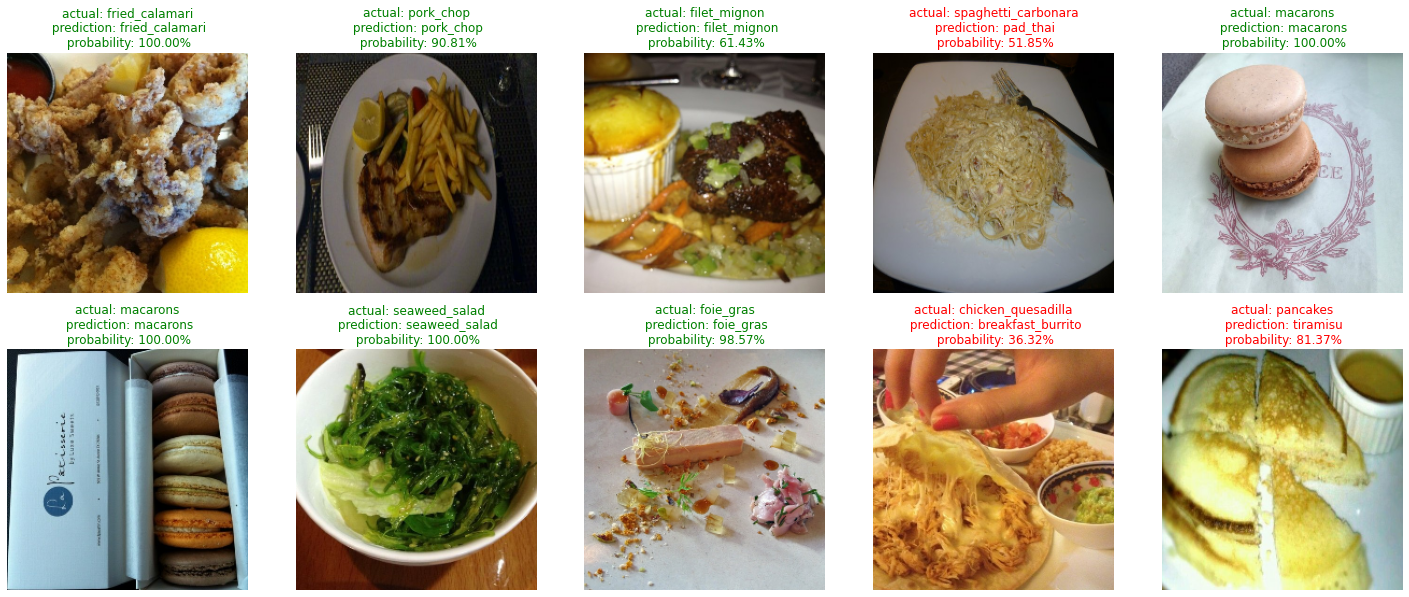

In [53]:
pred_and_plot(loaded_fine_tuned_model)

### Evaluating using a classification report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57       250
           1       0.78      0.68      0.73       250
           2       0.81      0.89      0.85       250
           3       0.82      0.82      0.82       250
           4       0.69      0.72      0.70       250
           5       0.52      0.77      0.62       250
           6       0.77      0.86      0.82       250
           7       0.89      0.88      0.89       250
           8       0.54      0.62      0.58       250
           9       0.80      0.63      0.71       250
          10       0.72      0.64      0.68       250
          11       0.80      0.84      0.82       250
          12       0.72      0.91      0.80       250
          13       0.87      0.68      0.76       250
          14       0.72      0.74      0.73       250
          15       0.69      0.60      0.64       250
          16       0.51      0.74      0.60       250
          17       0.83    

In [55]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.5700934579439252,
  'precision': 0.6853932584269663,
  'recall': 0.488,
  'support': 250},
 '1': {'f1-score': 0.7292110874200426,
  'precision': 0.7808219178082192,
  'recall': 0.684,
  'support': 250},
 '10': {'f1-score': 0.6779661016949153,
  'precision': 0.7207207207207207,
  'recall': 0.64,
  'support': 250},
 '100': {'f1-score': 0.8285077951002227,
  'precision': 0.9346733668341709,
  'recall': 0.744,
  'support': 250},
 '11': {'f1-score': 0.8203125,
  'precision': 0.8015267175572519,
  'recall': 0.84,
  'support': 250},
 '12': {'f1-score': 0.8042328042328042,
  'precision': 0.7192429022082019,
  'recall': 0.912,
  'support': 250},
 '13': {'f1-score': 0.7623318385650223,
  'precision': 0.8673469387755102,
  'recall': 0.68,
  'support': 250},
 '14': {'f1-score': 0.7258382642998029,
  'precision': 0.7159533073929961,
  'recall': 0.736,
  'support': 250},
 '15': {'f1-score': 0.6381156316916488,
  'precision': 0.6866359447004609,
  'recall': 0.596,
  'support': 25

### Get precision, recall, f1-scores for each class

In [56]:
import pandas as pd

# Create empty dictionary
class_precision = {}
class_recall = {}
class_f1_scores = {}

# Loop through the classification_report_dict items
for key, value in classification_report_dict.items():
  if key == "accuracy":
    break
  else:
    class_precision[class_names[int(key)]] = value["precision"]
    class_recall[class_names[int(key)]] = value["recall"]
    class_f1_scores[class_names[int(key)]] = value["f1-score"]

# Turn into DataFrame for visualisation
df_class_results = pd.DataFrame({"class_names": list(class_precision.keys()),
                                 "precision": list(class_precision.values()),
                                 "recall": list(class_recall.values()),
                                 "f1-score": list(class_f1_scores.values())})
df_class_results

class_names  precision  recall  f1-score
0         apple_pie   0.685393   0.488  0.570093
1    baby_back_ribs   0.780822   0.684  0.729211
2           baklava   0.805054   0.892  0.846300
3    beef_carpaccio   0.823293   0.820  0.821643
4      beef_tartare   0.689655   0.720  0.704501
..              ...        ...     ...       ...
96            tacos   0.665480   0.748  0.704331
97         takoyaki   0.878661   0.840  0.858896
98         tiramisu   0.602446   0.788  0.682842
99     tuna_tartare   0.517544   0.708  0.597973
100         waffles   0.934673   0.744  0.828508

[101 rows x 4 columns]

### Make confusion matrix

In [57]:
# Build a confusion matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=90, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

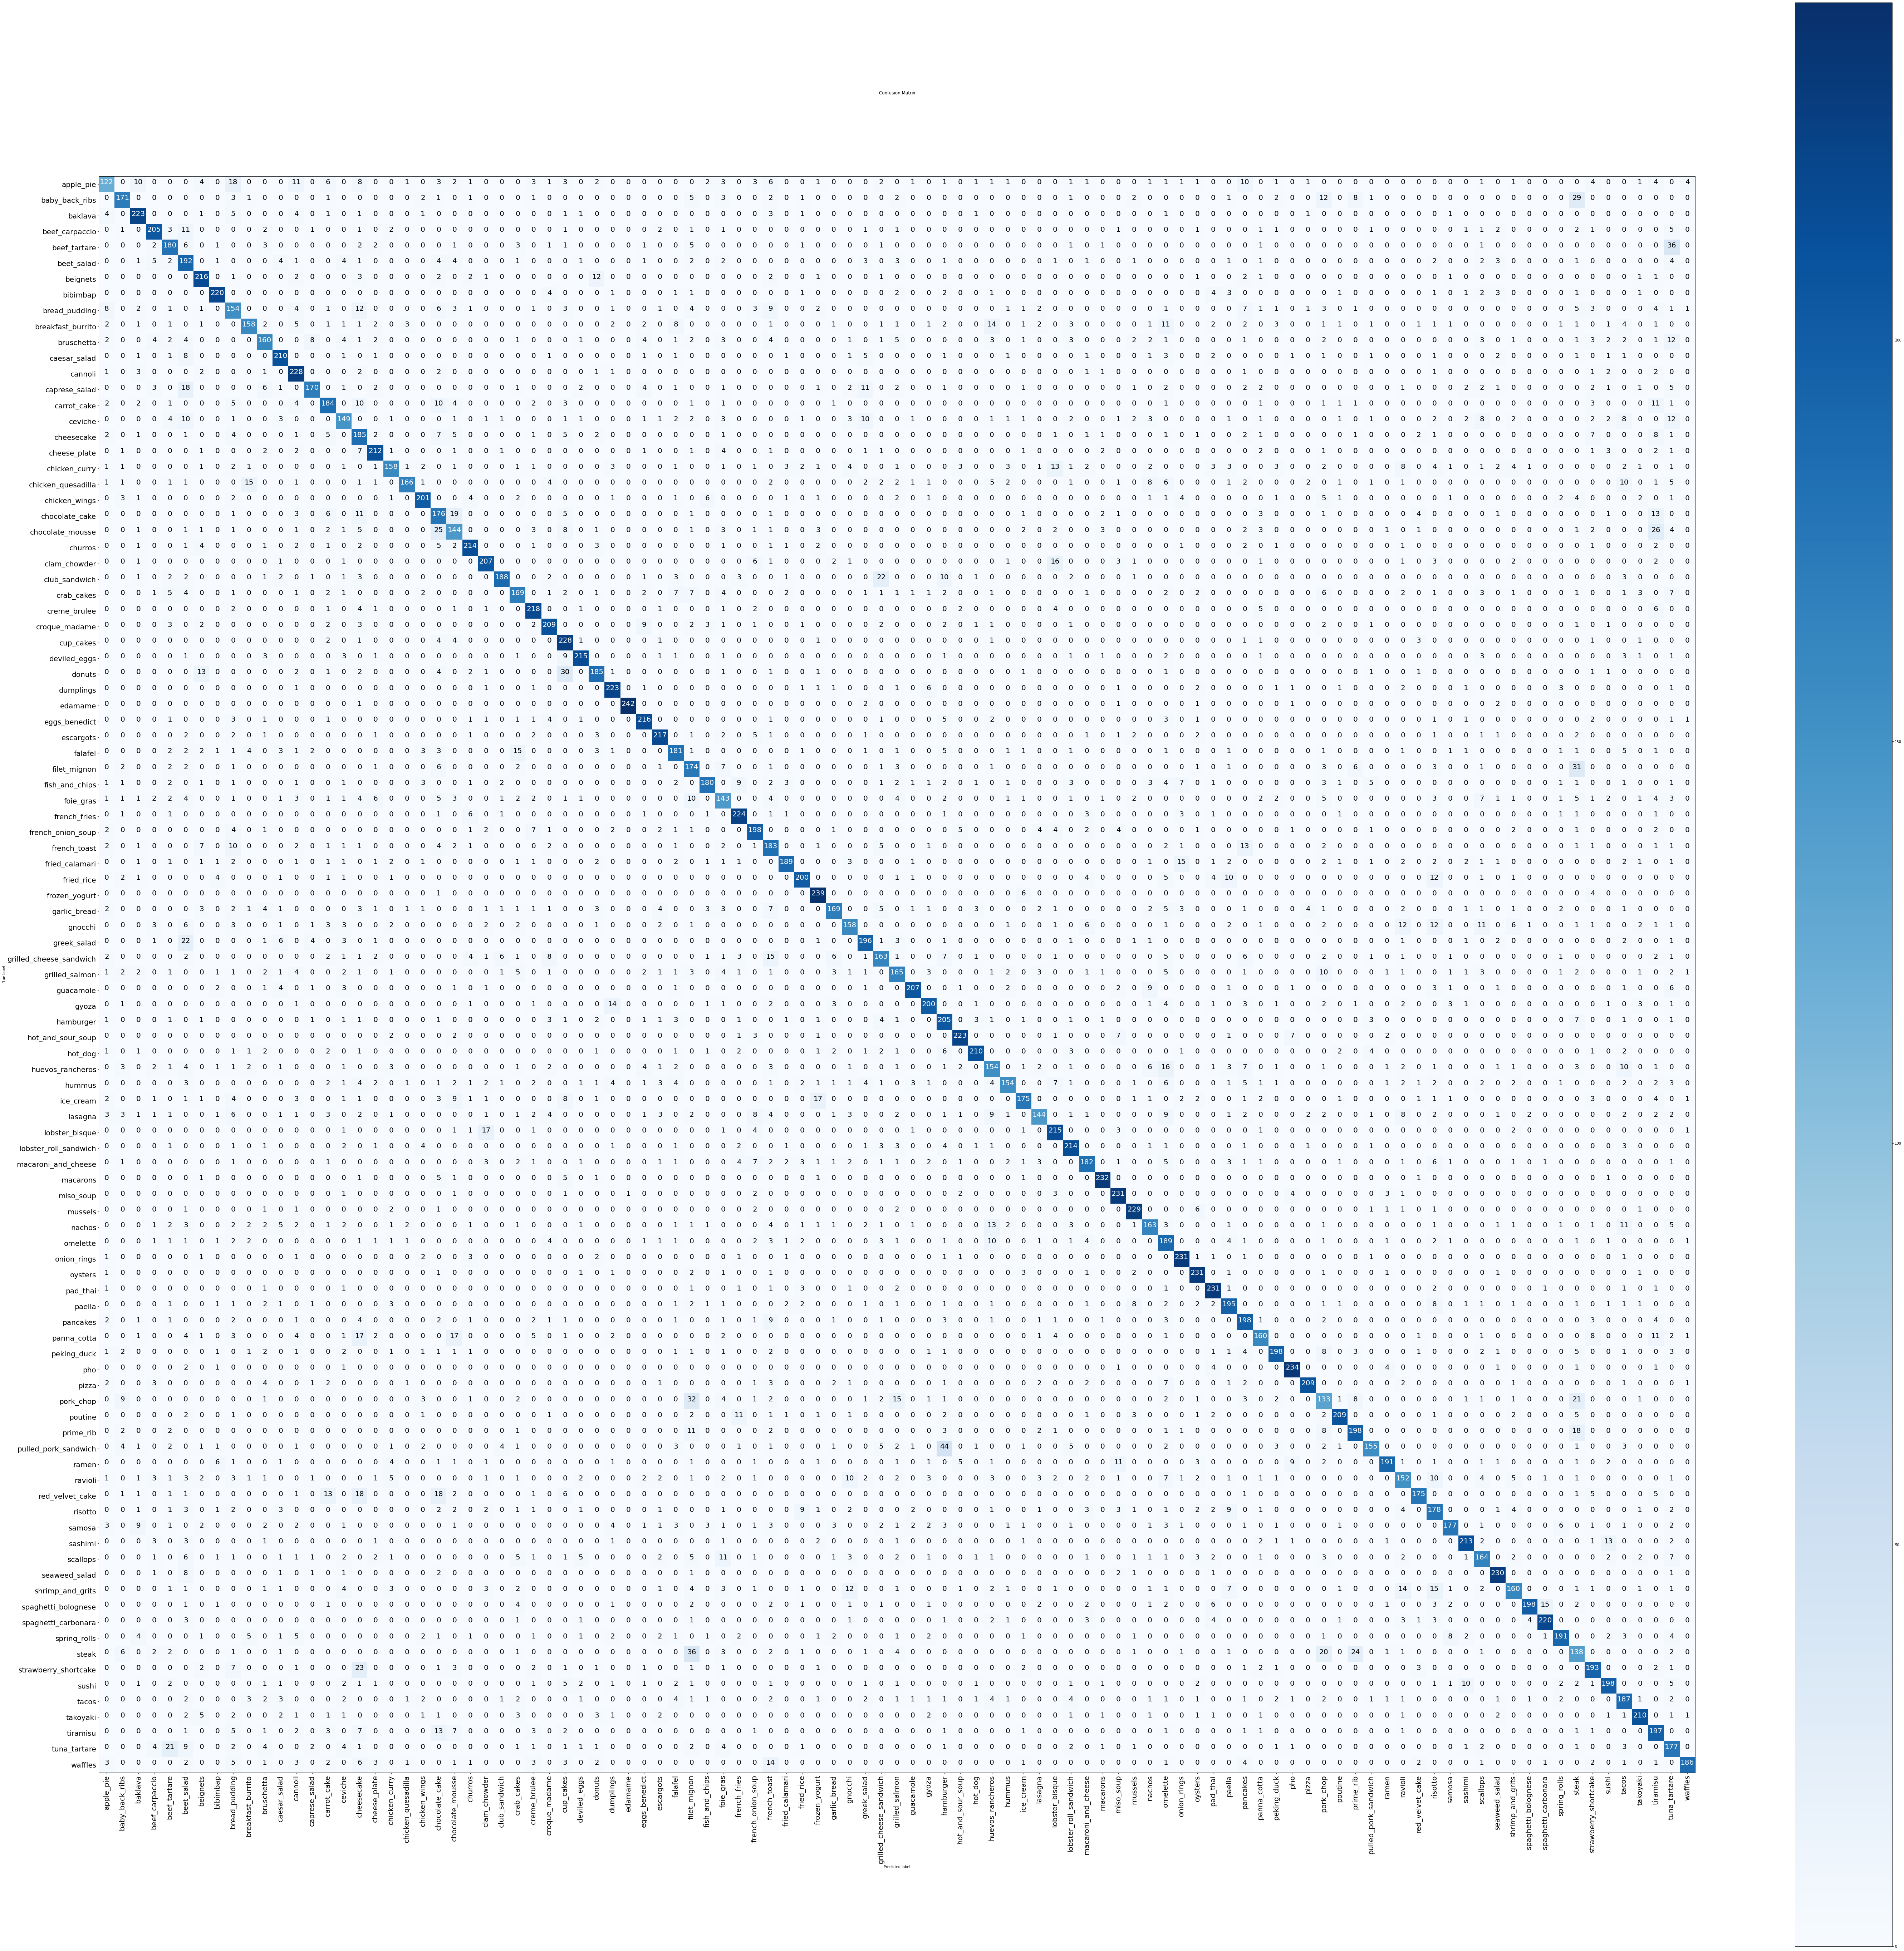

In [58]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      savefig=True)

### Finding the most wrong predictions

In [59]:
# Create a DataFrame
predictions = pd.DataFrame({"image_index": len(range(25250)),
                            "y_true": y_labels,
                            "y_pred": pred_classes,
                            "probability": pred_probs.max(axis=1),
                            "y_true_classname": [class_names[i] for i in y_labels],
                            "y_pred_classname": [class_names[i] for i in pred_classes]})
predictions

image_index  y_true  y_pred  probability     y_true_classname  \
0            25250      29      29     0.995221            cup_cakes   
1            25250      81      81     0.989080                ramen   
2            25250      91      91     0.999347  spaghetti_carbonara   
3            25250      53      53     0.999996            hamburger   
4            25250      97      97     0.998740             takoyaki   
...            ...     ...     ...          ...                  ...   
25245        25250      38      38     1.000000       fish_and_chips   
25246        25250      86      86     1.000000              sashimi   
25247        25250      76      10     0.434081                pizza   
25248        25250      31      31     1.000000               donuts   
25249        25250      21      21     0.936280       chocolate_cake   

          y_pred_classname  
0                cup_cakes  
1                    ramen  
2      spaghetti_carbonara  
3                hamburger  
4                 takoyaki  
...                    ...  
25245       fish_and_chips  
25246              sashimi  
25247           bruschetta  
25248               donuts  
25249       chocolate_cake  

[25250 rows x 6 columns]

In [60]:
# Find the predictions that are wrong
predictions["pred_correct"] = predictions["y_true"] == predictions["y_pred"]
predictions.head()

image_index  y_true  y_pred  probability     y_true_classname  \
0        25250      29      29     0.995221            cup_cakes   
1        25250      81      81     0.989080                ramen   
2        25250      91      91     0.999347  spaghetti_carbonara   
3        25250      53      53     0.999996            hamburger   
4        25250      97      97     0.998740             takoyaki   

      y_pred_classname  pred_correct  
0            cup_cakes          True  
1                ramen          True  
2  spaghetti_carbonara          True  
3            hamburger          True  
4             takoyaki          True

In [61]:
# Sort out DataFrame to have the most wrong predictions on the top
top_100_wrong = predictions[predictions["pred_correct"] == False].sort_values("probability", ascending=False)[:100]
top_100_wrong.head(20)

image_index  y_true  y_pred  probability  y_true_classname  \
900          25250      14      29     1.000000       carrot_cake   
13884        25250      46      10     1.000000      garlic_bread   
19780        25250      31      29     1.000000            donuts   
9735         25250      87      30     1.000000          scallops   
7455         25250      43      68     1.000000    fried_calamari   
1113         25250      72      67     1.000000          pancakes   
15437        25250      56      66     1.000000  huevos_rancheros   
23821        25250      99      61     1.000000      tuna_tartare   
5804         25250      48      66     1.000000       greek_salad   
22788        25250      63      29     0.999999          macarons   
2330         25250      63      29     0.999999          macarons   
3067         25250      86      95     0.999997           sashimi   
22323        25250      64      54     0.999997         miso_soup   
7853         25250      71      87     0.999997            paella   
7659         25250      68      70     0.999996       onion_rings   
20931        25250      93      39     0.999995             steak   
18690        25250      36      26     0.999993           falafel   
14234        25250      52      32     0.999993             gyoza   
11586        25250      74      70     0.999992       peking_duck   
2562         25250      29      97     0.999990         cup_cakes   

            y_pred_classname  pred_correct  
900                cup_cakes         False  
13884             bruschetta         False  
19780              cup_cakes         False  
9735            deviled_eggs         False  
7455             onion_rings         False  
1113                omelette         False  
15437                 nachos         False  
23821  lobster_roll_sandwich         False  
5804                  nachos         False  
22788              cup_cakes         False  
2330               cup_cakes         False  
3067                   sushi         False  
22323      hot_and_sour_soup         False  
7853                scallops         False  
7659                pad_thai         False  
20931              foie_gras         False  
18690             crab_cakes         False  
14234              dumplings         False  
11586               pad_thai         False  
2562                takoyaki         False

## Visualise predictions on custom images

In [62]:
# Get custom images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

--2022-04-25 09:42:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  --.-KB/s    in 0.1s    

2022-04-25 09:42:01 (104 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [63]:
from helper_functions import unzip_data, load_and_prep_image
unzip_data("custom_food_images.zip")

In [66]:
# Get the custom food images filepath
import os
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/steak.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/pizza-dad.jpeg']

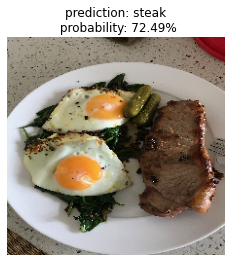

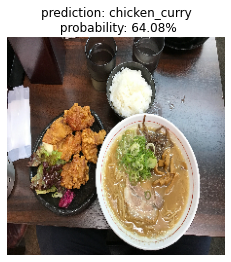

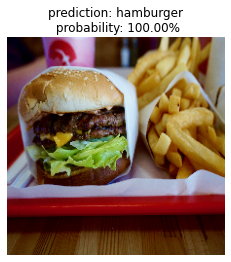

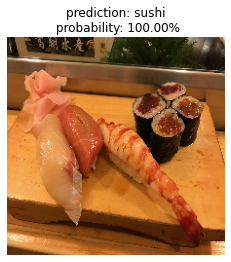

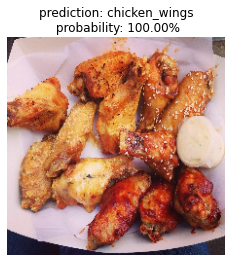

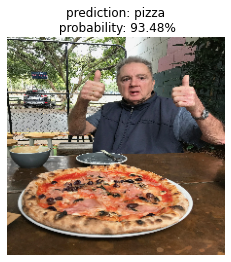

In [67]:
# Make predictions on custom food images and plot it
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False)
  pred_probs = loaded_fine_tuned_model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_probs.argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.axis(False)
  plt.title(f"prediction: {pred_class}\n probability: {(pred_probs.max())*100:.2f}%")

The model only got the 2nd prediction wrong (actual: ramen, prediction: chicken curry)

## Retrain the whole model using `EfficientNetB4` instead

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model

In [69]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [70]:
# Create the model
base_model = tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=[224, 224, 3], name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="output_layer")(x)
efficientnetB4_feature_extraction_model = keras.Model(inputs, outputs)

# Compile the model
efficientnetB4_feature_extraction_model.compile(loss="sparse_categorical_crossentropy",
                                                optimizer=tf.keras.optimizers.Adam(),
                                                metrics=["accuracy"])

# Fit the model with callbacks
history_efficientnetB4_feature_extraction = efficientnetB4_feature_extraction_model.fit(train_data,
                                                                                        epochs=3,
                                                                                        steps_per_epoch=len(train_data),
                                                                                        validation_data=test_data,
                                                                                        validation_steps=int(0.15 * len(test_data)),
                                                                                        callbacks=[create_tensorboard_callback(dir_name="milestone_project_1_food_vision",
                                                                                                                               experiment_name="food_vision_all_data_efficientnetB4_feature_extraction_model"),
                                                                                                   model_checkpoint])

71696384/71686520 [==============================] - 2s 0us/step
Saving TensorBoard log files to milestone_project_1_food_vision/food_vision_all_data_efficientnetB4_feature_extraction_model/20220425-094559
Epoch 1/3
2368/2368 [==============================] - 358s 141ms/step - loss: 1.8705 - accuracy: 0.5377 - val_loss: 1.3367 - val_accuracy: 0.6517
Epoch 2/3
2368/2368 [==============================] - 302s 126ms/step - loss: 1.3889 - accuracy: 0.6403 - val_loss: 1.2463 - val_accuracy: 0.6708
Epoch 3/3
2368/2368 [==============================] - 300s 126ms/step - loss: 1.2409 - accuracy: 0.6747 - val_loss: 1.1998 - val_accuracy: 0.6888


In [71]:
# Evaluate the model on all the test data
results_efficientnetB4_feature_extraction = efficientnetB4_feature_extraction_model.evaluate(test_data)

790/790 [==============================] - 89s 112ms/step - loss: 1.1973 - accuracy: 0.6816


In [72]:
# Save the model
efficientnetB4_feature_extraction_model.save("/content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_feature_extraction_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_feature_extraction_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_feature_extraction_model/assets


In [74]:
# Load the saved model
loaded_efficientnetB4_feature_extraction_model = tf.keras.models.load_model("/content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_feature_extraction_model")

In [75]:
# check the evaluations of the loaded model
results_loaded_efficientnetB4_feature_extraction = loaded_efficientnetB4_feature_extraction_model.evaluate(test_data)

790/790 [==============================] - 94s 115ms/step - loss: 1.1973 - accuracy: 0.6816


In [76]:
# Compare the evaluation of the saved and loaded model
import numpy as np
np.isclose(results_efficientnetB4_feature_extraction, results_loaded_efficientnetB4_feature_extraction)

array([ True,  True])

In [77]:
# Set all layers to trainable
for layer in loaded_efficientnetB4_feature_extraction_model.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb4 True float32 <Policy "mixed_float16">
global_average_pooling_2D_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "float32">


In [78]:
# Recompile the model
loaded_efficientnetB4_feature_extraction_model.compile(loss="sparse_categorical_crossentropy",
                                                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                                                       metrics=["accuracy"])

# Fit the model again for fine-tuning
history_efficientnetB4_fine_tuning = loaded_efficientnetB4_feature_extraction_model.fit(train_data,
                                                                                        epochs=100,
                                                                                        steps_per_epoch=len(train_data),
                                                                                        validation_data=test_data,
                                                                                        validation_steps=int(0.15 * len(test_data)),
                                                                                        callbacks=[create_tensorboard_callback(dir_name="milestone_project_1_food_vision",
                                                                                                                               experiment_name="food_vision_all_data_efficientnetB4_fine_tuning_model"),
                                                                                                   model_checkpoint,
                                                                                                   earlystopping_callback])

Saving TensorBoard log files to milestone_project_1_food_vision/food_vision_all_data_efficientnetB4_fine_tuning_model/20220425-102024
Epoch 1/100
2368/2368 [==============================] - 839s 341ms/step - loss: 0.9281 - accuracy: 0.7510 - val_loss: 0.6960 - val_accuracy: 0.8059
Epoch 2/100
2368/2368 [==============================] - 798s 336ms/step - loss: 0.3702 - accuracy: 0.8950 - val_loss: 0.7905 - val_accuracy: 0.7836
Epoch 3/100
2368/2368 [==============================] - 802s 338ms/step - loss: 0.1281 - accuracy: 0.9608 - val_loss: 0.8959 - val_accuracy: 0.7937
Epoch 4/100
2368/2368 [==============================] - 802s 338ms/step - loss: 0.0865 - accuracy: 0.9726 - val_loss: 0.9338 - val_accuracy: 0.7982


In [79]:
# Evaluate the model on the whole test data
results_efficientnetB4_fine_tuned = loaded_efficientnetB4_feature_extraction_model.evaluate(test_data)

790/790 [==============================] - 92s 116ms/step - loss: 0.9679 - accuracy: 0.7936


In [80]:
# Save the model
loaded_efficientnetB4_feature_extraction_model.save("/content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_fine_tuning_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_fine_tuning_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_fine_tuning_model/assets


In [81]:
# Load the saved model
loaded_efficientnetB4_fine_tuning_model = tf.keras.models.load_model("/content/drive/MyDrive/tensorflow_projects/food_vision_efficientnetB4_fine_tuning_model")

In [82]:
# Check the evaluations of the loaded model
results_loaded_efficientnetB4_fine_tuned = loaded_efficientnetB4_fine_tuning_model.evaluate(test_data)

790/790 [==============================] - 93s 113ms/step - loss: 0.9679 - accuracy: 0.7936


In [83]:
# Compare the evaluations of the saved and loaded model
import numpy as np
np.isclose(results_efficientnetB4_fine_tuned, results_loaded_efficientnetB4_fine_tuned)

array([ True,  True])

In [84]:
# Find prediction probability and prediction classes
pred_probs_efficientnetB4 = loaded_efficientnetB4_fine_tuning_model.predict(test_data, verbose=1)
pred_classes_efficientnetB4 = pred_probs_efficientnetB4.argmax(axis=1)

pred_classes_efficientnetB4[:10]

790/790 [==============================] - 85s 103ms/step


array([29, 81, 91, 53, 97, 31, 10, 31,  3, 58])

In [85]:
# Check accuracy score
from sklearn.metrics import accuracy_score
sklearn_accuracy_efficientnetB4 = accuracy_score(y_labels, pred_classes_efficientnetB4)

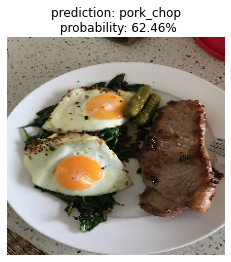

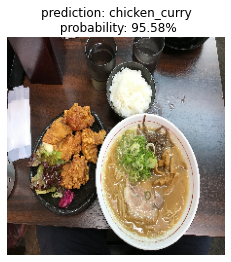

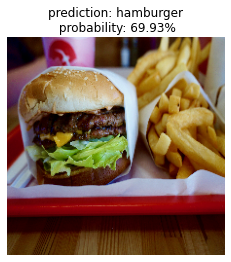

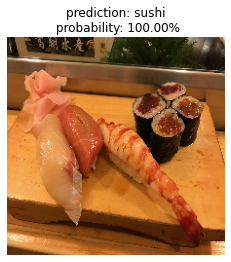

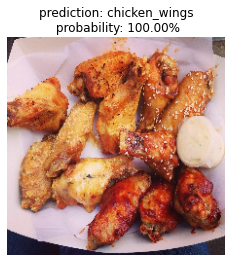

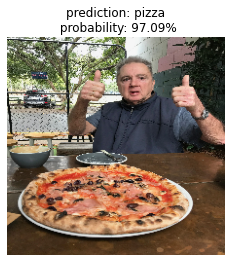

In [88]:
# Make predictions on custom food images and plot it
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False)
  pred_probs = loaded_efficientnetB4_fine_tuning_model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_probs.argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.axis(False)
  plt.title(f"prediction: {pred_class}\n probability: {(pred_probs.max())*100:.2f}%")

The EfficientNetB4 model:
* took a longer time to train (300s vs 250s for feature extraction and 800s vs 360s for fine tuning)
* but had a higher accuracy (79.4% vs 76.5% after fine tuning)
* got the first 2 predictions on custom images wrong
* had a higher prediction probability for pizza, but lower prediction probability for hamburger

It will probably perform a lot better if trained for longer during feature extraction.